In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import os
os.getcwd()

'/Users/shaileshmahto/Documents/UB/Academics/EAS 508 Statistical  Learning & Data Mining 1/Project/cancer-prediction'

In [69]:
data_location = 'data/breast+cancer+wisconsin+prognostic/wpbc.data'

In [70]:
data = pd.read_csv(data_location, header=0, names=
                   ["id", "outcome", "time",
"radiusMean", "textureMean", "perimeterMean", "areaMean", "smoothnessMean", "compactnessMean", "concavityMean",
"concavePointsMean", "symmetryMean", "fractalDimensionMean",

"radiusSE", "textureSE", "perimeterSE", "areaSE", "smoothnessSE", "compactnessSE", "concavitySE",
"concavePointsSE", "symmetrySE", "fractalDimensionSE",

"radiusWrst", "textureWrst", "perimeterWrst", "areaWrst", "smoothnessWrst", "compactnessWrst", "concavityWrst",
"concavePointsWrst", "symmetryWrst", "fractalDimensionWrst",

"tumorSize", "lymphNodeStatus"])

data.head()

,id,outcome,time,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,...,perimeterWrst,areaWrst,smoothnessWrst,compactnessWrst,concavityWrst,concavePointsWrst,symmetryWrst,fractalDimensionWrst,tumorSize,lymphNodeStatus
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


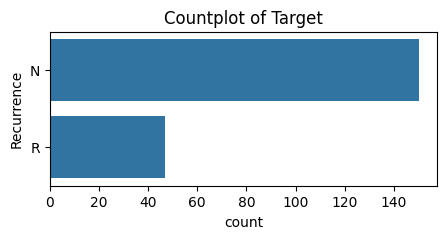

<Figure size 640x480 with 0 Axes>

In [71]:


plt.figure(figsize=(5,2))
sns.countplot(data['outcome'])
plt.title('Countplot of Target')
plt.xlabel('count')
plt.ylabel('Recurrence')
plt.show()

plt.savefig("images/countplot.png")


In [72]:
data[data["lymphNodeStatus"] == "?"]["id"]

5      844359
27     854253
84     877500
195    947204
Name: id, dtype: int64

In [73]:
data_svm = data

data_svm["outcome"] = data_svm["outcome"].replace(["N", "R"], [0, 1])

# remove records with no data
data_svm = data_svm[data_svm["lymphNodeStatus"] != "?"]

data_svm = data_svm.drop(["id"], axis = 1)

data_svm.head()

,outcome,time,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,perimeterWrst,areaWrst,smoothnessWrst,compactnessWrst,concavityWrst,concavePointsWrst,symmetryWrst,fractalDimensionWrst,tumorSize,lymphNodeStatus
0,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [74]:
print(data_svm['outcome'].value_counts())
147/(147+46)

outcome
0    147
1     46
Name: count, dtype: int64


0.7616580310880829

Hence a model that predicts N will be accurate 76.16% times

In [75]:
147 + 46

193

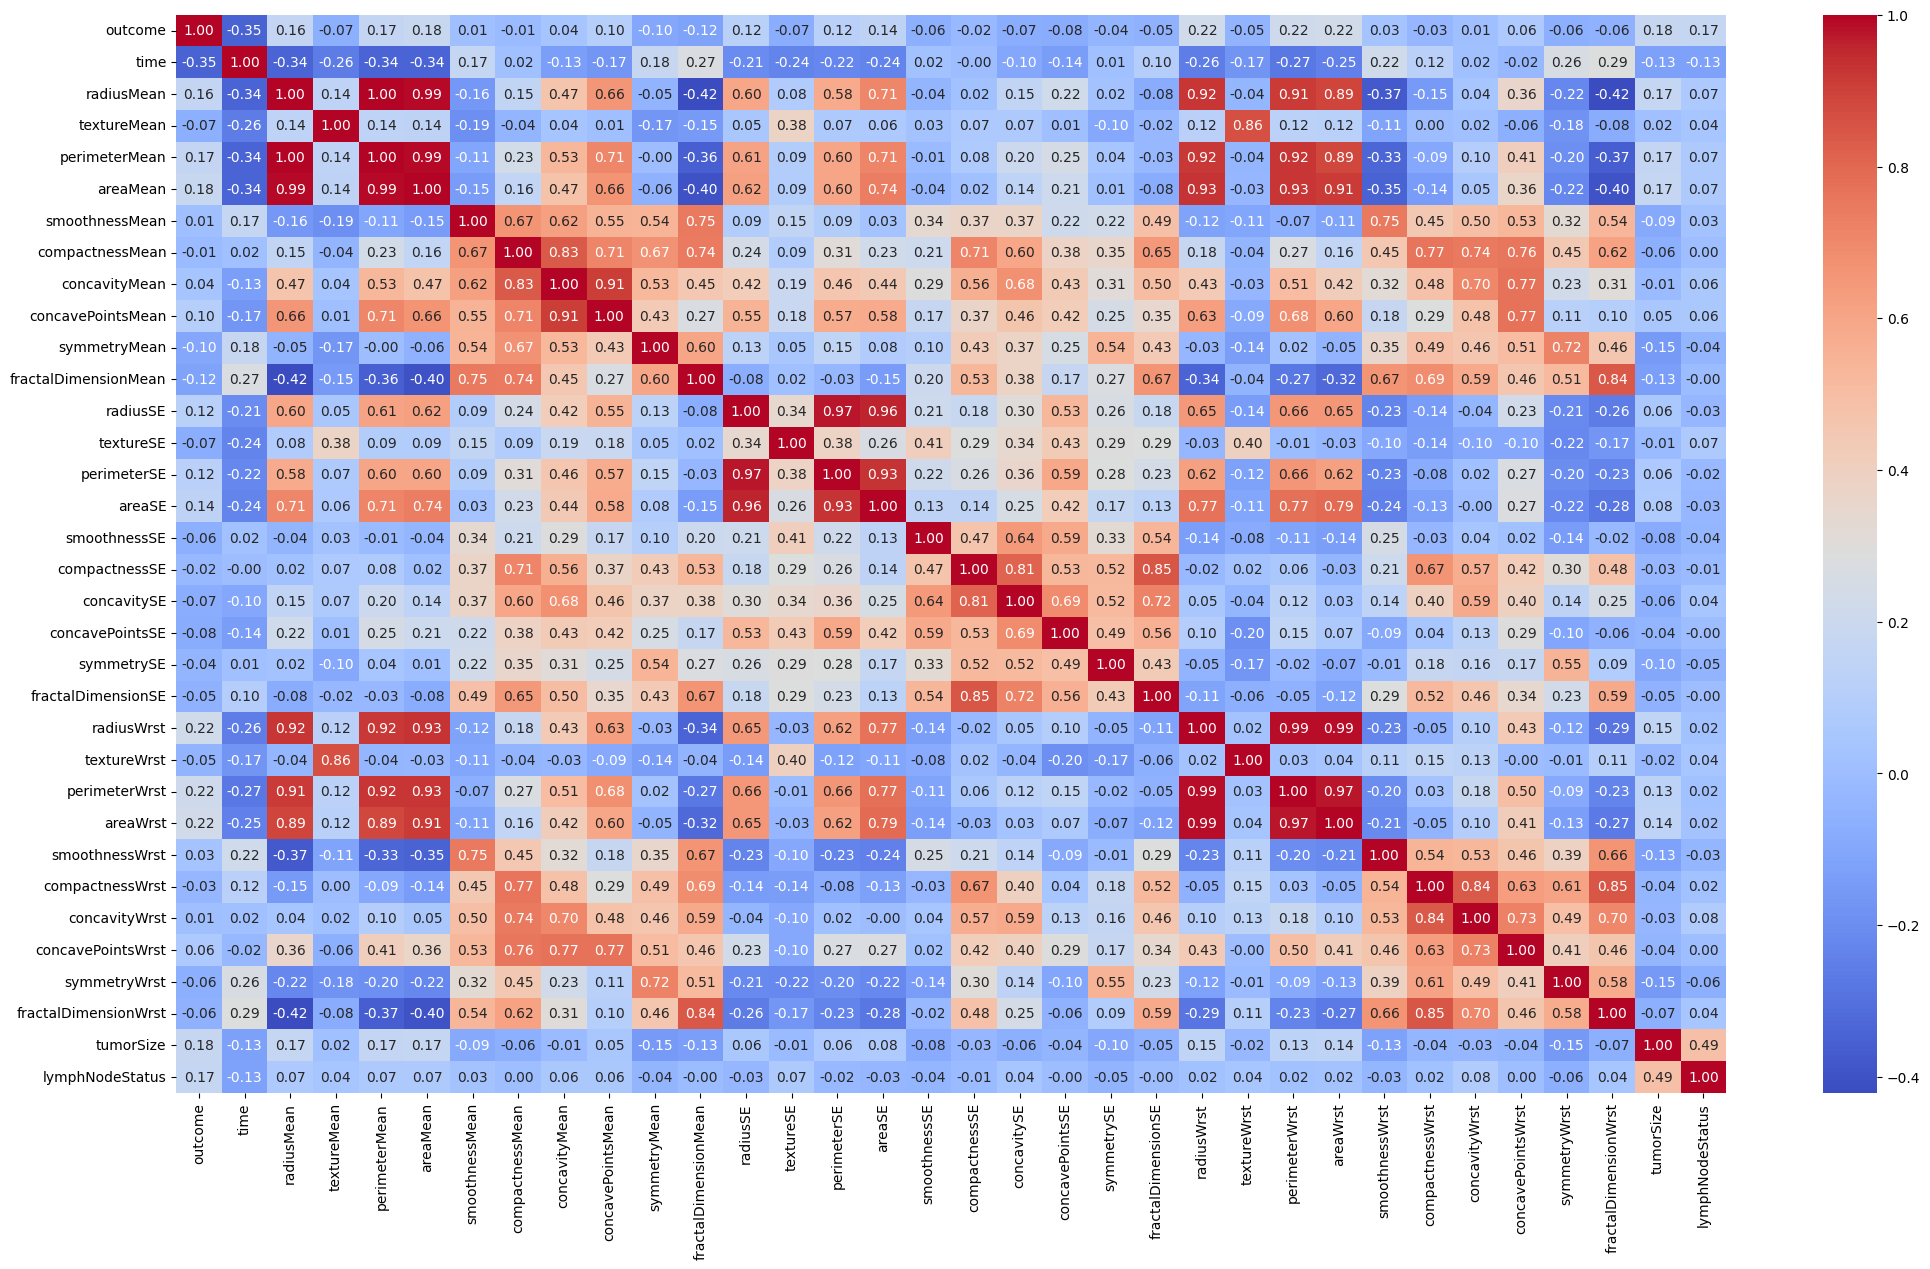

In [76]:
# Plotting the correlation matrix

correlation_matrix = data_svm.corr()
plt.figure(figsize=(25, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

plt.savefig("images/correlation matrix.png")

In [77]:
data_svm.head().transpose

<bound method DataFrame.transpose of    outcome  time  radiusMean  textureMean  perimeterMean  areaMean  \
0        0    61       17.99        10.38         122.80    1001.0   
1        0   116       21.37        17.44         137.50    1373.0   
2        0   123       11.42        20.38          77.58     386.1   
3        1    27       20.29        14.34         135.10    1297.0   
4        1    77       12.75        15.29          84.60     502.7   

   smoothnessMean  compactnessMean  concavityMean  concavePointsMean  ...  \
0         0.11840           0.2776         0.3001            0.14710  ...   
1         0.08836           0.1189         0.1255            0.08180  ...   
2         0.14250           0.2839         0.2414            0.10520  ...   
3         0.10030           0.1328         0.1980            0.10430  ...   
4         0.11890           0.1569         0.1664            0.07666  ...   

   perimeterWrst  areaWrst  smoothnessWrst  compactnessWrst  concavityWrst  \
0

In [78]:
X = data_svm.loc[:, data_svm.columns != "outcome"]
y = data_svm["outcome"]

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154, 33), (39, 33), (154,), (39,))

In [79]:
y_train.value_counts(), y_test.value_counts()

(outcome
 0    117
 1     37
 Name: count, dtype: int64,
 outcome
 0    30
 1     9
 Name: count, dtype: int64)

In [80]:
print(f"Baseline model:")
print(f"Train accuracy: {117/(117 + 37)}, Test Accuracy: {30/(30+9)}")

Baseline model:
Train accuracy: 0.7597402597402597, Test Accuracy: 0.7692307692307693


In [81]:
X_train.shape

(154, 33)

In [146]:
def model_performance(ensemble_classifier):
    y_train_pred = ensemble_classifier.predict(X_train)

    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    true_positives_train = conf_matrix_train[1, 1]  
    false_negatives_train = conf_matrix_train[1, 0]
    true_negatives_train = conf_matrix_train[0, 0]  
    false_positives_train = conf_matrix_train[0, 1]

    # Calculate Specificity
    specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)

    sensitivity_train = true_positives_train / (true_positives_train + false_negatives_train)

    accuracy_train = (true_positives_train + true_negatives_train)/(true_negatives_train + false_positives_train + true_positives_train + false_negatives_train)
    accuracy_train

    y_test_pred = ensemble_classifier.predict(X_test)

    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    true_positives_test = conf_matrix_test[1, 1]  
    false_negatives_test = conf_matrix_test[1, 0]
    true_negatives_test = conf_matrix_test[0, 0]  
    false_positives_test = conf_matrix_test[0, 1]

    # Calculate Specificity
    specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

    sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

    accuracy_test = (true_positives_test + true_negatives_test)/(true_negatives_test + false_positives_test + true_positives_test + false_negatives_test)

    return accuracy_test, sensitivity_test, specificity_test, accuracy_train, sensitivity_train, specificity_train

    # y_pred = ensemble_classifier.predict(X_train)

In [147]:
def get_model_metrics(model_name, ensemble_classifier):
    # template for capturing model performance metrics
    model_to_assess = ensemble_classifier
    model_name = model_name

    accuracy_test, sensitivity_test, specificity_test, accuracy_train, sensitivity_train, specificity_train = model_performance(model_to_assess)

    record1 = pd.DataFrame({
        'Model': [f"{model_name}"], 
        'TestAccuracy': [f"{accuracy_test}"], 
        'TestSensitivity': [f"{sensitivity_test}"],
        "TestSpecificity": [f"{specificity_test}"], 
        'TrainAccuracy': [f"{accuracy_train}"], 
        'TrainSensitivity': [f"{sensitivity_train}"],
        "TrainSpecificity": [f"{specificity_train}"], 
        "Notes": [f"{model_to_assess.get_params}"]})
    return record1

In [84]:
# creating an accuracy counter
import pandas as pd

# Create an empty DataFrame with columns
columns = ['Model', 'TestAccuracy', 'TestSensitivity', "TestSpecificity", 'TrainAccuracy', 'TrainSensitivity', "TrainSpecificity", "Notes"]
model_perf_df = pd.DataFrame(columns=columns)

# # Add records one at a time
# record1 = {'Name': 'John', 'Age': 25, 'City': 'New York'}
# df = df.append(record1, ignore_index=True)

# Print the DataFrame
print(model_perf_df)



Empty DataFrame
Columns: [Model, TestAccuracy, TestSensitivity, TestSpecificity, TrainAccuracy, TrainSensitivity, TrainSpecificity, Notes]
Index: []


In [158]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# Use a VotingClassifier for an ensemble
ensemble_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier), ('svm', svm_classifier)],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority voting
)

#Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

#Evaluate the ensemble model
y_pred = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8717948717948718


In [160]:
model_name = "RF + GBM + SVC Reduced Features"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [161]:
model_perf_df.to_excel("model perf for new ensemble models.xlsx", index=False)

### Fitting individual models

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Print Accuracy
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.8461538461538461


In [163]:
model_name = "RF Reduced"
model_to_assess = model_rf
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [164]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Rest of the code
model = SVC(probability=True, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.8461538461538461


In [165]:
model_name = "SVC Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [166]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")


Gradient Boosting Accuracy: 0.7948717948717948


In [167]:
model_name = "GBM Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.7692307692307693


In [169]:
model_name = "Decision Tree Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")


KNN Accuracy: 0.7692307692307693


In [171]:
model_name = "KNN Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8717948717948718


In [173]:
model_name = "Logistic Regression Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [174]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = GaussianNB()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")


Naive Bayes Accuracy: 0.6923076923076923


In [175]:
model_name = "Naive Bayes Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [176]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = AdaBoostClassifier(n_estimators=50, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy}")


AdaBoost Accuracy: 0.7435897435897436


In [177]:
model_name = "Adaboost Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [178]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier(n_estimators=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Accuracy: 0.8974358974358975


In [179]:
model_name = "XGBoost Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [180]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy}")


Neural Network Accuracy: 0.8461538461538461


In [181]:
model_name = "MLP Reduced Features"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# List of classifiers
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=50, random_state=42),
    SVC(probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    GaussianNB(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    XGBClassifier(n_estimators=100, random_state=42),
]


# Loop through classifiers
for model in classifiers:
    model_name = type(model).__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Convert confusion matrix to a DataFrame for better visualization
    confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # Print the confusion matrix and accuracy for each model
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_df)

    # Print Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")



Model: RandomForestClassifier
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            8            1
Accuracy: 0.7948717948717948

Model: GradientBoostingClassifier
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           29            1
Actual 1            4            5
Accuracy: 0.8717948717948718

Model: AdaBoostClassifier
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           28            2
Actual 1            5            4
Accuracy: 0.8205128205128205

Model: SVC
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            9            0
Accuracy: 0.7692307692307693

Model: DecisionTreeClassifier
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           29            1
Actual 1            5            4
Accuracy: 0.8461538461538461

Model: KNeighborsClassifier
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           29 

In [108]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
svc_classifier = SVC(probability=True, random_state=42)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('gb', gb_classifier),
        ('ada', ada_classifier),
        ('svc', svc_classifier),
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            5            4
Ensemble Accuracy: 0.8717948717948718


In [109]:
model_name = "RF + GBM + Adaboost + SVC"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


Duplicate code in next cell

In [110]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# import pandas as pd



# # Define individual classifiers
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
# gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
# svc_classifier = SVC(probability=True, random_state=42)

# # Create a StackingClassifier
# ensemble_classifier = StackingClassifier(
#     estimators=[('rf', rf_classifier), ('ada', ada_classifier), ('gb', gb_classifier)],
#     final_estimator=svc_classifier
# )

# # Train the ensemble model
# ensemble_classifier.fit(X_train, y_train)

# # Make predictions
# y_pred = ensemble_classifier.predict(X_test)

# # Create a confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Convert confusion matrix to a DataFrame for better visualization
# confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# # Print the confusion matrix and accuracy for the ensemble model
# print("Ensemble Confusion Matrix:")
# print(confusion_df)

# # Print Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Ensemble Accuracy: {accuracy}")


In [111]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Define individual classifiers
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
svc_classifier = SVC(probability=True, random_state=42)

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('gb', gb_classifier), ('mlp', mlp_classifier)],
    final_estimator=svc_classifier
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            9            0
Ensemble Accuracy: 0.7692307692307693


In [112]:
model_name = "GBM + MLP + SVC"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd



# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
knn_classifier = KNeighborsClassifier()

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('lr', lr_classifier), ('svm', svm_classifier), ('knn', knn_classifier)]
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            9            0
Ensemble Accuracy: 0.7692307692307693


In [114]:
model_name = "LR + SVC + KNN"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd



# Define individual classifiers
lr_classifier1 = LogisticRegression(random_state=42)
lr_classifier2 = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('lr1', lr_classifier1), ('lr2', lr_classifier2), ('svm', svm_classifier), ('rf', rf_classifier)]
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            6            3
Ensemble Accuracy: 0.8461538461538461


In [116]:
# model_perf_df = model_perf_df.drop([14])

In [153]:
model_name = "LR + LR+ SVC + RF Reduced features"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Data loading and preprocessing
# ... (Assuming X, y, and train-test split)

# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('lr', lr_classifier), ('svm', svm_classifier), ('adaboost', adaboost_classifier)]
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            7            2
Ensemble Accuracy: 0.8205128205128205


In [151]:
model_name = "LR + SVC + Adaboost Reduced Features"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Data loading and preprocessing
# ... (Assuming X, y, and train-test split)

# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('lr', lr_classifier), ('knn', knn_classifier), ('rf', rf_classifier)]
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            9            0
Ensemble Accuracy: 0.7692307692307693


In [121]:
model_name = "LR + KNN + RF"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Data loading and preprocessing
# ... (Assuming X, y, and train-test split)

# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Create a StackingClassifier
ensemble_classifier = StackingClassifier(
    estimators=[('lr', lr_classifier), ('knn', knn_classifier), ('adaboost', adaboost_classifier)]
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            7            2
Ensemble Accuracy: 0.8205128205128205


In [148]:
model_name = "LR + KNN + Adaboost Reduced features"
model_to_assess = ensemble_classifier
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [124]:
# from sklearn.model_selection import GridSearchCV

# # Data loading and preprocessing
# # ... (Assuming X, y)

# # Define individual classifiers
# lr_classifier = LogisticRegression(random_state=42)
# svm_classifier = SVC(probability=True, random_state=42)
# knn_classifier = KNeighborsClassifier()

# # Create a StackingClassifier
# ensemble_classifier = StackingClassifier(
#     estimators=[('lr', lr_classifier), ('svm', svm_classifier), ('knn', knn_classifier)]
# )

# # Parameter grid for hyperparameter tuning
# param_grid = {
#     'lr__C': [0.1, 1, 10],
#     'svm__C': [0.1, 1, 10],
#     'knn__n_neighbors': [3, 5, 7]
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(ensemble_classifier, param_grid, cv=5)

# # Fit the model
# grid_search.fit(X, y)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Perform cross-validation and evaluate
# cv_results = cross_val_score(best_model, X, y, cv=5)
# print("Cross-Validation Results:", cv_results)
# print("Mean Accuracy:", cv_results.mean())


In [231]:
model_perf_df.to_excel("model_performace_tracker3.xlsx")

## Feature Selection

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8205128205128205


In [127]:
feature_names = (list(data_svm.columns))[1:]

# Get feature weights (coefficients)
feature_weights = model.coef_[0]

# Create a DataFrame to display feature names and weights
feature_df = pd.DataFrame({'Feature': feature_names, 'Weight': feature_weights})



In [128]:
feature_df = feature_df.reindex(feature_df["Weight"].abs().sort_values(ascending=False).index)

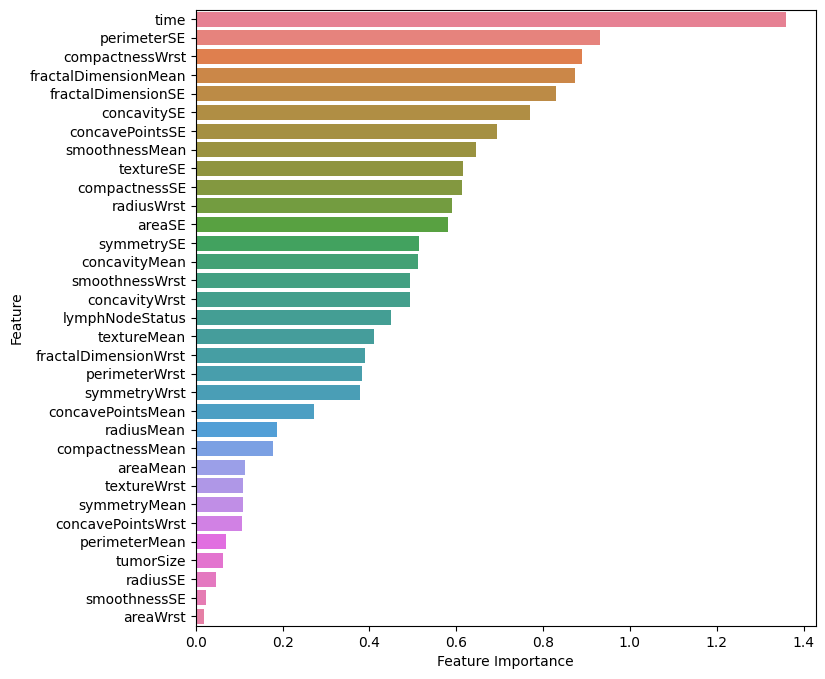

In [129]:
feature_df #new

feature_df["Feature Importance"] = abs(feature_df["Weight"])

plt.figure(figsize=(8, 8))
sns.barplot(feature_df, x="Feature Importance", y="Feature", hue="Feature")

plt.savefig("images/feature importance plot.png")


In [130]:
feature_df

,Feature,Weight,Feature Importance
0,time,-1.360090,1.360090
13,perimeterSE,0.931166,0.931166
26,compactnessWrst,-0.890721,0.890721
10,fractalDimensionMean,-0.874069,0.874069
20,fractalDimensionSE,0.829462,0.829462
17,concavitySE,-0.769459,0.769459
18,concavePointsSE,-0.692731,0.692731
5,smoothnessMean,0.644622,0.644622
12,textureSE,-0.615397,0.615397
16,compactnessSE,0.612271,0.612271


In [131]:
model_name = "LR"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
record1

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,LR,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...


In [132]:
columns = ['Model', 'TestAccuracy', 'TestSensitivity', "TestSpecificity", 'TrainAccuracy', 'TrainSensitivity', "TrainSpecificity", "Notes"]
feature_sel_df = pd.DataFrame(columns=columns)

In [133]:
features_to_remove = []
data_filtered = data_svm.drop(features_to_remove, axis = 1)

# train-test-split
X = data_svm.loc[:, data_svm.columns != "outcome"]
y = data_svm["outcome"]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# model training
model = LogisticRegression(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# model metrics
model_name = "LR10"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
record1
feature_sel_df = pd.concat([feature_sel_df, record1], ignore_index=True)
feature_sel_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,LR10,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...


In [134]:
feature_df

,Feature,Weight,Feature Importance
0,time,-1.360090,1.360090
13,perimeterSE,0.931166,0.931166
26,compactnessWrst,-0.890721,0.890721
10,fractalDimensionMean,-0.874069,0.874069
20,fractalDimensionSE,0.829462,0.829462
17,concavitySE,-0.769459,0.769459
18,concavePointsSE,-0.692731,0.692731
5,smoothnessMean,0.644622,0.644622
12,textureSE,-0.615397,0.615397
16,compactnessSE,0.612271,0.612271


In [135]:
sorted_features

['time',
 'perimeterSE',
 'compactnessWrst',
 'fractalDimensionMean',
 'fractalDimensionSE',
 'concavitySE',
 'concavePointsSE',
 'smoothnessMean',
 'textureSE',
 'compactnessSE',
 'radiusWrst',
 'areaSE',
 'symmetrySE',
 'concavityMean',
 'smoothnessWrst',
 'concavityWrst',
 'lymphNodeStatus',
 'textureMean',
 'fractalDimensionWrst',
 'perimeterWrst',
 'symmetryWrst',
 'concavePointsMean',
 'radiusMean',
 'compactnessMean',
 'areaMean',
 'textureWrst',
 'symmetryMean',
 'concavePointsWrst',
 'perimeterMean',
 'tumorSize',
 'radiusSE',
 'smoothnessSE',
 'areaWrst']

In [136]:
i = 0 
features_to_remove = sorted_features[0:feature_count-i]
features_to_remove

['time',
 'perimeterSE',
 'compactnessWrst',
 'fractalDimensionMean',
 'fractalDimensionSE',
 'concavitySE',
 'concavePointsSE',
 'smoothnessMean',
 'textureSE',
 'compactnessSE',
 'radiusWrst',
 'areaSE',
 'symmetrySE',
 'concavityMean',
 'smoothnessWrst',
 'concavityWrst',
 'lymphNodeStatus',
 'textureMean',
 'fractalDimensionWrst',
 'perimeterWrst',
 'symmetryWrst',
 'concavePointsMean',
 'radiusMean',
 'compactnessMean',
 'areaMean',
 'textureWrst',
 'symmetryMean',
 'concavePointsWrst',
 'perimeterMean',
 'tumorSize',
 'radiusSE',
 'smoothnessSE',
 'areaWrst']

In [137]:
def model_performance(ensemble_classifier, X_train, X_test, y_train, y_test):
    y_train_pred = ensemble_classifier.predict(X_train)

    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    true_positives_train = conf_matrix_train[1, 1]  
    false_negatives_train = conf_matrix_train[1, 0]
    true_negatives_train = conf_matrix_train[0, 0]  
    false_positives_train = conf_matrix_train[0, 1]

    # Calculate Specificity
    specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)

    sensitivity_train = true_positives_train / (true_positives_train + false_negatives_train)

    accuracy_train = (true_positives_train + true_negatives_train)/(true_negatives_train + false_positives_train + true_positives_train + false_negatives_train)
    accuracy_train

    y_test_pred = ensemble_classifier.predict(X_test)

    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    true_positives_test = conf_matrix_test[1, 1]  
    false_negatives_test = conf_matrix_test[1, 0]
    true_negatives_test = conf_matrix_test[0, 0]  
    false_positives_test = conf_matrix_test[0, 1]

    # Calculate Specificity
    specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)

    sensitivity_test = true_positives_test / (true_positives_test + false_negatives_test)

    accuracy_test = (true_positives_test + true_negatives_test)/(true_negatives_test + false_positives_test + true_positives_test + false_negatives_test)

    return accuracy_test, sensitivity_test, specificity_test, accuracy_train, sensitivity_train, specificity_train

    # y_pred = ensemble_classifier.predict(X_train)

def get_model_metrics(model_name, ensemble_classifier, X_train, X_test, y_train, y_test):
    # template for capturing model performance metrics
    model_to_assess = ensemble_classifier
    model_name = model_name

    accuracy_test, sensitivity_test, specificity_test, accuracy_train, sensitivity_train, specificity_train = model_performance(model_to_assess, X_train, X_test, y_train, y_test)

    record1 = pd.DataFrame({
        'Model': [f"{model_name}"], 
        'TestAccuracy': [f"{accuracy_test}"], 
        'TestSensitivity': [f"{sensitivity_test}"],
        "TestSpecificity": [f"{specificity_test}"], 
        'TrainAccuracy': [f"{accuracy_train}"], 
        'TrainSensitivity': [f"{sensitivity_train}"],
        "TrainSpecificity": [f"{specificity_train}"], 
        "Notes": [f"{model_to_assess.get_params}"]})
    return record1

In [138]:
def fit_model_on_customized_feature_set(features_to_remove):
    features_to_remove = features_to_remove
    model_name = f"LR{len(features_to_remove)}"


    data_filtered = data_svm.drop(features_to_remove, axis = 1)

    # train-test-split
    X = data_filtered.loc[:, data_filtered.columns != "outcome"]
    y = data_filtered["outcome"]
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109, stratify=y)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape

    # model training
    model = LogisticRegression(random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # model metrics
    model_to_assess = model
    record1 = get_model_metrics(model_name, model_to_assess, X_train, X_test, y_train, y_test)
    return record1




In [139]:
sorted_features = list(feature_df["Feature"])
feature_count = len(sorted_features)

for i in range(feature_count-2):
    features_to_remove = sorted_features[feature_count-i-1:feature_count]
    record1 = fit_model_on_customized_feature_set(features_to_remove)
    feature_sel_df = pd.concat([feature_sel_df, record1], ignore_index=True)


In [321]:
feature_sel_df.to_excel("feature_sel_df.xlsx")

In [140]:
i = 14
features_to_remove = sorted_features[feature_count-i-1:feature_count]
len(features_to_remove)

15

In [141]:
# feature_set 
feature_set = [f for f in sorted_features if f not in features_to_remove]


In [142]:
data_filtered = data_svm.drop(features_to_remove, axis = 1)

In [143]:
# train-test-split
X = data_filtered.loc[:, data_filtered.columns != "outcome"]
y = data_filtered["outcome"]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154, 18), (39, 18), (154,), (39,))

## Tuning MLP Classifier

In [359]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy}")


Neural Network Accuracy: 0.8461538461538461


In [388]:
model_perf_df.to_excel("model_perf_df_feature_subset.xlsx")

## Tuning the best model first - XGBoost

In [393]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, None],
    'n_estimators': [50, 100, 200, None],
    'max_depth': [3, 5, 7, None],
    'min_child_weight': [1, 3, 5, None],
    'subsample': [0.8, 1.0, None],
    'colsample_bytree': [0.8, 1.0, None],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}


In [394]:
model_name = "XGB Tuned 2"
model_to_assess = best_model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,XGB Tuned,0.8461538461538461,0.3333333333333333,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
1,XGB Tuned 2,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [398]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier(n_estimators=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Accuracy: 0.8974358974358975


In [396]:
# best model
model_name = "XGB Tuned 3"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,XGB Tuned,0.8461538461538461,0.3333333333333333,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
1,XGB Tuned 2,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
2,XGB Tuned 3,0.8974358974358975,0.6666666666666666,0.9666666666666667,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [400]:
import joblib
joblib.dump(model, "models/xgboost_model.joblib")

['models/xgboost_model.joblib']

## Bringing in LR model

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Print Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8717948717948718


In [402]:
model_name = "LR"
model_to_assess = model
record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,XGB Tuned,0.8461538461538461,0.3333333333333333,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
1,XGB Tuned 2,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
2,XGB Tuned 3,0.8974358974358975,0.6666666666666666,0.9666666666666667,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
3,LR,0.8717948717948718,0.5555555555555556,0.9666666666666667,0.8571428571428571,0.5135135135135135,0.9658119658119658,<bound method BaseEstimator.get_params of Logi...


In [404]:
joblib.dump(model, "models/logistic_regression.job")

['models/logistic_regression.job']

## Fitting an ensemble model with LR and XGBoost

In [405]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('lr', lr_classifier), 
        ('xgb', xgb_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           30            0
Actual 1            3            6
Ensemble Accuracy: 0.9230769230769231


In [406]:
model_name = "LR + XGBoost"
model_to_assess = ensemble_classifier

record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,XGB Tuned,0.8461538461538461,0.3333333333333333,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
1,XGB Tuned 2,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
2,XGB Tuned 3,0.8974358974358975,0.6666666666666666,0.9666666666666667,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
3,LR,0.8717948717948718,0.5555555555555556,0.9666666666666667,0.8571428571428571,0.5135135135135135,0.9658119658119658,<bound method BaseEstimator.get_params of Logi...
4,LR + XGBoost,0.9230769230769231,0.6666666666666666,1.0,0.987012987012987,0.9459459459459459,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...


In [186]:
model_perf_df.to_excel("model_performance_tracker_ensemble.xlsx")

Other ensemble models

In [156]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('lr', lr_classifier), 
        ('xgb', xgb_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           29            1
Actual 1            3            6
Ensemble Accuracy: 0.8974358974358975


In [157]:
model_name = "LR + XGBoost + MLP Reduced Features"
model_to_assess = ensemble_classifier

record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [184]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Define individual classifiers
lr_classifier = LogisticRegression(random_state=42)
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('lr', lr_classifier), 
        # ('xgb', xgb_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='soft'  # 'soft' for probability voting
)

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix and accuracy for the ensemble model
print("Ensemble Confusion Matrix:")
print(confusion_df)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Ensemble Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           29            1
Actual 1            5            4
Ensemble Accuracy: 0.8461538461538461


In [185]:
model_name = "LR + MLP Reduced Features"
model_to_assess = ensemble_classifier

record1 = get_model_metrics(model_name, model_to_assess)
model_perf_df = pd.concat([model_perf_df, record1], ignore_index=True)
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...


In [188]:
model_perf_df.to_excel("model_performance_tracker_ensemble.xlsx")

In [187]:
model_perf_df

,Model,TestAccuracy,TestSensitivity,TestSpecificity,TrainAccuracy,TrainSensitivity,TrainSpecificity,Notes
0,RF + GBM + SVC,0.8717948717948718,0.4444444444444444,1.0,1.0,1.0,1.0,<bound method _BaseHeterogeneousEnsemble.get_p...
1,RF,0.7948717948717948,0.1111111111111111,1.0,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Rand...
2,SVC,0.7692307692307693,0.0,1.0,0.8116883116883117,0.21621621621621623,1.0,<bound method BaseEstimator.get_params of SVC(...
3,GBM,0.8717948717948718,0.5555555555555556,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Grad...
4,Decision Tree,0.8461538461538461,0.4444444444444444,0.9666666666666667,1.0,1.0,1.0,<bound method BaseEstimator.get_params of Deci...
5,KNN,0.8461538461538461,0.4444444444444444,0.9666666666666667,0.8116883116883117,0.35135135135135137,0.9572649572649573,<bound method BaseEstimator.get_params of KNei...
6,Logistic Regression,0.8205128205128205,0.4444444444444444,0.9333333333333333,0.8766233766233766,0.6216216216216216,0.9572649572649573,<bound method BaseEstimator.get_params of Logi...
7,Naive Bayes,0.717948717948718,0.6666666666666666,0.7333333333333333,0.6688311688311688,0.5945945945945946,0.6923076923076923,<bound method BaseEstimator.get_params of Gaus...
8,Adaboost,0.8205128205128205,0.4444444444444444,0.9333333333333333,1.0,1.0,1.0,<bound method BaseEstimator.get_params of AdaB...
9,XGBoost,0.8974358974358975,0.5555555555555556,1.0,1.0,1.0,1.0,<bound method XGBModel.get_params of XGBClassi...
